In [95]:
import torch
from torch import nn

import matplotlib.pyplot as plt
from intervals import Interval
import numpy as np
from tqdm.notebook import tqdm
import random

import env
import gdbp_falsification
import Model

from importlib import reload
reload(env)
reload(gdbp_falsification)
reload(Model)

from env import Osillator, OsillatorGpu
from gdbp_falsification import mdist_to_boundary, init_falsify_gdbp_search, DQN, SwitchController
from Model import Actor

In [3]:
random_init_states = np.random.uniform(low=-2, high=2, size=(100, 2))
print(random_init_states.shape)

(100, 2)


In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [23]:
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

In [30]:
n_mesh = 10
eps = 1e-4
high = 2 - eps
low = -2 + eps
single_mesh = np.arange(low, high + (high - low) / n_mesh, (high - low) / n_mesh)
mesh = cartesian_product(single_mesh, single_mesh)
print(mesh.shape)

(121, 2)


In [17]:
model_1 = Actor(state_size=2, action_size=1, seed=0, fc1_units=25, fc2_units=None).to(device)
model_1.load_state_dict(torch.load("./models/actor_2800.pth", map_location=torch.device('cpu')))
model_1.eval()

Actor(
  (fc1): Linear(in_features=2, out_features=25, bias=True)
  (fc3): Linear(in_features=25, out_features=1, bias=True)
)

In [ ]:
all_init_state_histories = {}

In [65]:
step_size = 0.1
init_state_histories = []
for init_state in tqdm(mesh):
    state_histories = init_falsify_gdbp_search(model_1, device=device, init_state=init_state, 
                                               step_size=step_size, return_seq=True)
    init_state_history = np.array([h[0] for h in state_histories])
    init_state_histories.append(init_state_history)

([<matplotlib.axis.YTick at 0x7fa046acb9b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

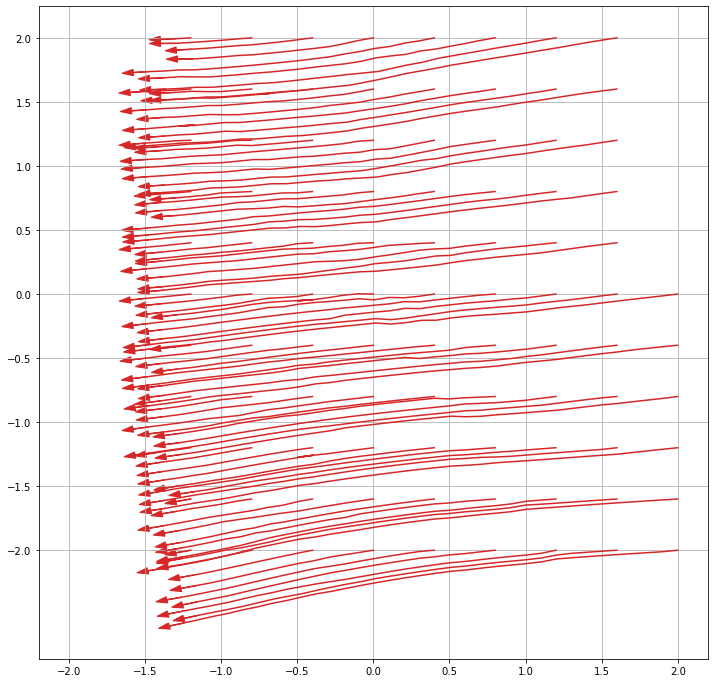

In [78]:
plt.figure(figsize=(12, 12))
for init_state_history in init_state_histories:
    color = 'tab:green' if init_state_history.shape[0] == 100 else 'tab:red'
    plt.plot(init_state_history[:, 0], init_state_history[:, 1], color=color)
    if init_state_history.shape[0] < 2:
        continue
    plt.arrow(init_state_history[-2][0], init_state_history[-2][1],
              init_state_history[-1][0] - init_state_history[-2][0],
              init_state_history[-1][1] - init_state_history[-2][1],
              head_width=0.05, color=color)
plt.grid()
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.xlim((-2, 2))
# plt.ylim((-2, 2))

In [79]:
step_size = 0.01
init_state_histories = []
for init_state in tqdm(mesh):
    state_histories = init_falsify_gdbp_search(model_1, device=device, init_state=init_state, 
                                               step_size=step_size, return_seq=True)
    init_state_history = np.array([h[0] for h in state_histories])
    init_state_histories.append(init_state_history)

In [ ]:
all_init_state_histories[step_size] = init_state_histories

([<matplotlib.axis.YTick at 0x7fa04893afd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

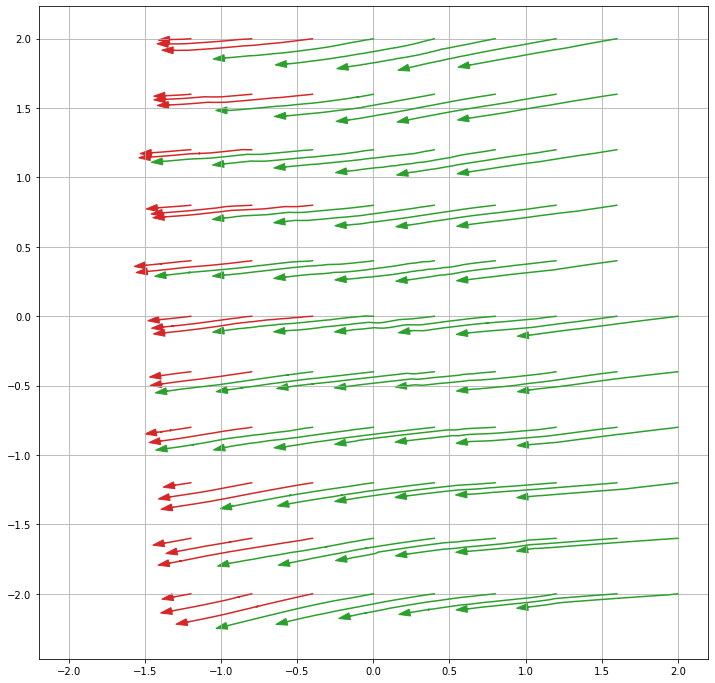

In [80]:
plt.figure(figsize=(12, 12))
for init_state_history in init_state_histories:
    color = 'tab:green' if init_state_history.shape[0] == 100 else 'tab:red'
    plt.plot(init_state_history[:, 0], init_state_history[:, 1], color=color)
    if init_state_history.shape[0] < 2:
        continue
    plt.arrow(init_state_history[-2][0], init_state_history[-2][1],
              init_state_history[-1][0] - init_state_history[-2][0],
              init_state_history[-1][1] - init_state_history[-2][1],
              head_width=0.05, color=color)
plt.grid()
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.xlim((-2, 2))
# plt.ylim((-2, 2))

In [82]:
step_size = 0.001
init_state_histories = []
for init_state in tqdm(mesh):
    state_histories = init_falsify_gdbp_search(model_1, device=device, init_state=init_state, 
                                               step_size=step_size, return_seq=True)
    init_state_history = np.array([h[0] for h in state_histories])
    init_state_histories.append(init_state_history)

([<matplotlib.axis.YTick at 0x7fa04927fe10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

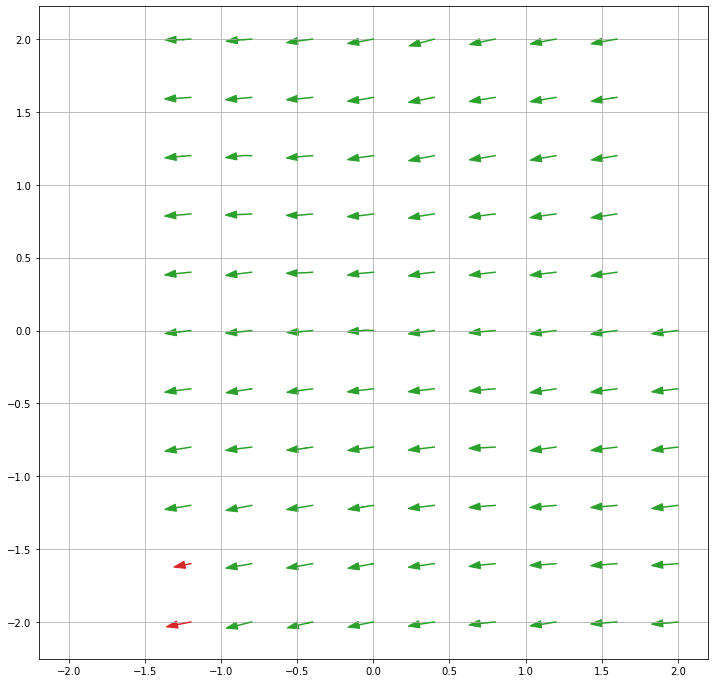

In [83]:
plt.figure(figsize=(12, 12))
for init_state_history in init_state_histories:
    color = 'tab:green' if init_state_history.shape[0] == 100 else 'tab:red'
    plt.plot(init_state_history[:, 0], init_state_history[:, 1], color=color)
    if init_state_history.shape[0] < 2:
        continue
    plt.arrow(init_state_history[-2][0], init_state_history[-2][1],
              init_state_history[-1][0] - init_state_history[-2][0],
              init_state_history[-1][1] - init_state_history[-2][1],
              head_width=0.05, color=color)
plt.grid()
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.xlim((-2, 2))
# plt.ylim((-2, 2))

In [111]:
class SwitchController(nn.Module):
    def __init__(self, base_model_paths, switch_path, device, soft_choice=False):
        super(SwitchController, self).__init__()
        self.base_models = []
        for base_model_path in base_model_paths:
            base_model = Actor(state_size=2, action_size=1, seed=0, fc1_units=25).to(device)
            base_model.load_state_dict(torch.load(base_model_path, map_location=device))
            base_model.eval()
            self.base_models.append(base_model)
        self.switch_model = DQN(2, 2).to(device)
        self.switch_model.load_state_dict(torch.load(switch_path, map_location=device))
        self.switch_model.eval()
        
        self.soft_choice = soft_choice
        
    def forward(self, state, soft_choice=None):
        if soft_choice is None:
            soft_choice = self.soft_choice
        if soft_choice:
            switch_soft_action = self.switch_model.softact(state)
            control_actions = torch.cat([base_model(state).view(1) for base_model in self.base_models])
            switch_action = (switch_soft_action * control_actions).sum()
        else:
            switch_hard_action = self.switch_model.act(state, 0)
            switch_action = self.base_models[switch_hard_action](state)
        return switch_action

In [100]:
sc = SwitchController(base_model_paths=["./models/actor_2800.pth", "./0731actors/actor_2400.pth"],
                      switch_path="switcher.pth", device=device)

In [101]:
step_size = 0.1
init_state_histories = []
for init_state in tqdm(mesh):
    state_histories = init_falsify_gdbp_search(sc, device=device, init_state=init_state, 
                                               step_size=step_size, return_seq=True)
    init_state_history = np.array([h[0] for h in state_histories])
    init_state_histories.append(init_state_history)

([<matplotlib.axis.YTick at 0x7fa04a1c7898>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

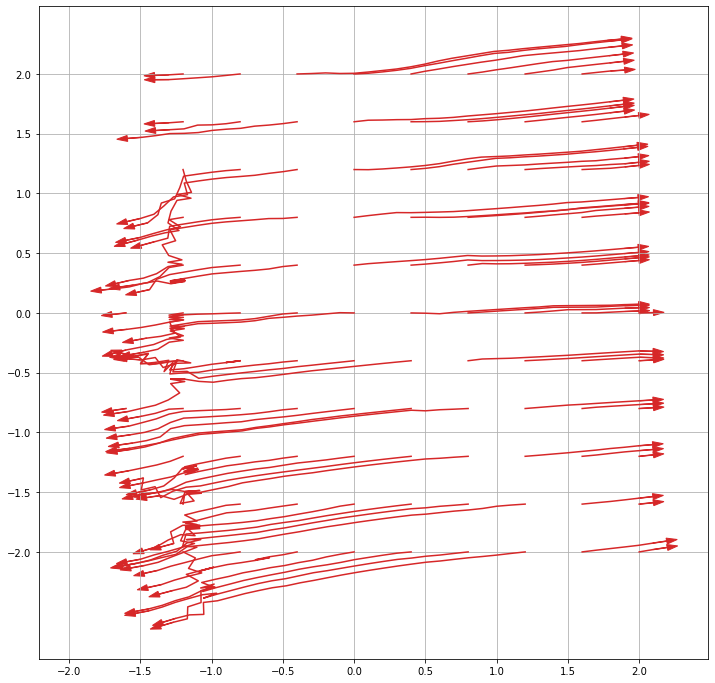

In [102]:
plt.figure(figsize=(12, 12))
for init_state_history in init_state_histories:
    color = 'tab:green' if init_state_history.shape[0] == 100 else 'tab:red'
    plt.plot(init_state_history[:, 0], init_state_history[:, 1], color=color)
    if init_state_history.shape[0] < 2:
        continue
    plt.arrow(init_state_history[-2][0], init_state_history[-2][1],
              init_state_history[-1][0] - init_state_history[-2][0],
              init_state_history[-1][1] - init_state_history[-2][1],
              head_width=0.05, color=color)
plt.grid()
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.xlim((-2, 2))
# plt.ylim((-2, 2))

In [103]:
step_size = 0.01
init_state_histories = []
for init_state in tqdm(mesh):
    state_histories = init_falsify_gdbp_search(sc, device=device, init_state=init_state, 
                                               step_size=step_size, return_seq=True)
    init_state_history = np.array([h[0] for h in state_histories])
    init_state_histories.append(init_state_history)

([<matplotlib.axis.YTick at 0x7fa02afd2cc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

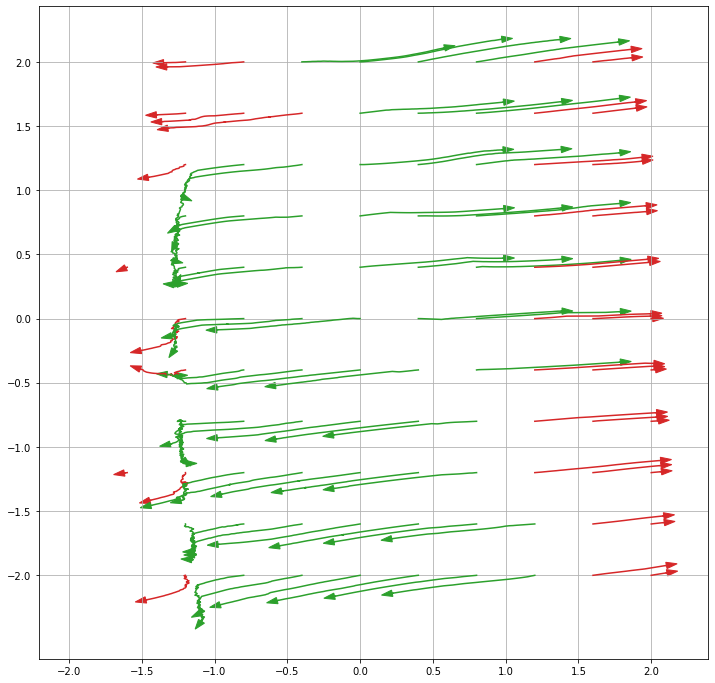

In [104]:
plt.figure(figsize=(12, 12))
for init_state_history in init_state_histories:
    color = 'tab:green' if init_state_history.shape[0] == 100 else 'tab:red'
    plt.plot(init_state_history[:, 0], init_state_history[:, 1], color=color)
    if init_state_history.shape[0] < 2:
        continue
    plt.arrow(init_state_history[-2][0], init_state_history[-2][1],
              init_state_history[-1][0] - init_state_history[-2][0],
              init_state_history[-1][1] - init_state_history[-2][1],
              head_width=0.05, color=color)
plt.grid()
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.xlim((-2, 2))
# plt.ylim((-2, 2))

In [113]:
sc_hard = SwitchController(base_model_paths=["./models/actor_2800.pth", "./0731actors/actor_2400.pth"],
                           switch_path="switcher.pth", device=device)
sc_soft = SwitchController(base_model_paths=["./models/actor_2800.pth", "./0731actors/actor_2400.pth"],
                           switch_path="switcher.pth", device=device, soft_choice=True)

In [114]:
step_size = 0.01
init_state = [0, 0]
state_histories_hard = init_falsify_gdbp_search(sc_hard, device=device, init_state=init_state, 
                                                step_size=step_size, return_seq=True)
state_histories_soft = init_falsify_gdbp_search(sc_soft, device=device, init_state=init_state, 
                                                step_size=step_size, return_seq=True)

In [120]:
len(state_histories_hard), state_histories_hard[0].shape

(100, (100, 2))

In [115]:
plt.figure(figsize=(12, 12))

for state_history, label, color in [(state_histories_hard, 'hard', 'tab:orange'), 
                                    (state_histories_soft, 'soft', 'tab:blue')]:
    plt.plot(state_history[:, 0], state_history[:, 1], label=label, color=color)
    plt.arrow(state_history[-2][0], state_history[-2][1],
              state_history[-1][0] - state_history[-2][0],
              state_history[-1][1] - state_history[-2][1],
              head_width=0.05, color=color)
plt.grid()
plt.legend()
plt.xticks(np.arange(-2, 2.5, 0.5))
plt.yticks(np.arange(-2, 2.5, 0.5))
# plt.xlim((-2, 2))
# plt.ylim((-2, 2))

TypeError: list indices must be integers or slices, not tuple

<Figure size 864x864 with 0 Axes>